### Agentic RAG

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.embeddings import OllamaEmbeddings

c:\Users\Vanilla\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/",
    "https://docs.langchain.com/oss/python/langgraph/overview"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main content🚀 Share how you\'re building agents for a chance to win LangChain swag!Docs by LangChain home pageLangChain 

In [4]:
## iterating over the docs
docs_list = [item for sublist in docs for item in sublist]
print(docs_list)

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)
print(doc_splits)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=(OllamaEmbeddings(model="gemma:2b"))
)

# vectorstore=FAISS.from_documents(
#     documents=doc_splits,
#     embedding=OpenAIEmbeddings()
# )


retriever=vectorstore.as_retriever()

[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'), Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n'), Document(metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='LangGraph overview - Docs by LangChainSkip to main content🚀 Share how you\'re building agents for a chance to win LangChain swag!Docs by LangChain home pageLangChain + LangGrap

C:\Temp\ipykernel_5832\2081252122.py:16: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import OllamaEmbeddings``.
  embedding=(OllamaEmbeddings(model="gemma:2b"))


In [5]:
retriever.invoke("what is langgraph")

[Document(id='a216c62f-f3a8-4871-a7bb-be8fb40696dd', metadata={'source': 'https://docs.langchain.com/oss/python/langgraph/overview', 'title': 'LangGraph overview - Docs by LangChain', 'language': 'en'}, page_content='Trusted by companies shaping the future of agents— including Klarna, Replit, Elastic, and more— LangGraph is a low-level orchestration framework and runtime for building, managing, and deploying long-running, stateful agents.\nLangGraph is very low-level, and focused entirely on agent orchestration. Before using LangGraph, we recommend you familiarize yourself with some of the components used to build agents, starting with models and tools.\nWe will commonly use LangChain components throughout the documentation to integrate models and tools, but you don’t need to use LangChain to use LangGraph. If you are just getting started with agents or want a higher-level abstraction, we recommend you use LangChain’s agents that provide pre-built architectures for common LLM and tool-

In [6]:
### Retriever To Retriever Tools to integrate with llms
# from langchain.tools.retriever import create_retriever_tool
from langchain_core.tools import create_retriever_tool

retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)


In [7]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002B5EDD6BEB0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002B5E2E275B0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

In [8]:
# # Check what's in langchain.tools
# import langchain.tools
# print("Contents of langchain.tools:")
# print(dir(langchain.tools))

# # Check if there's a tools module at all
# import langchain
# print("\nLangChain version:", langchain.__version__)

# # List all submodules
# print("\nAvailable submodules:")
# import pkgutil
# for importer, modname, ispkg in pkgutil.iter_modules(langchain.__path__):
#     print(f"  {modname} {'(package)' if ispkg else ''}")

In [9]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002B5EDD6BEB0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002B5E2E275B0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), 

### Langchain Blogs- Seperate Vector Store


In [10]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/",
    "https://docs.langchain.com/oss/python/langchain/overview"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'Build a RAG agent with LangChain - Docs by LangChain', 'language': 'en'}, page_content='Build a RAG agent with LangChain - Docs by LangChainSkip to main content🚀 Share how you\'re building agents for a chance to win LangChain swag!Docs by LangChain home pageLangChain + LangGraphSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChainBuild a RAG agent with LangChainLangChainLangGraphDeep AgentsIntegrationsLearnReferenceContributePythonLearnTutorialsLangChainSemantic searchRAG agentSQL agentSupervisor agentLangGraphConceptual overviewsComponent architectureMemoryContextGraph APIFunctional APIAdditional resourcesLangChain AcademyCase studiesOn this pageOverviewConceptsPreviewSetupInstallationLangSmithComponents1. IndexingLoading documentsSplitting documentsStoring documents2. Retrieval and GenerationRAG agentsRAG chainsNext stepsTutorialsLangChainBuild a RAG agent with LangChainCo

In [11]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=(OllamaEmbeddings(model="gemma:2b"))
)

# vectorstorelangchain=FAISS.from_documents(
#     documents=doc_splits,
#     embedding=OpenAIEmbeddings()
# )

retrieverlangchain=vectorstorelangchain.as_retriever()



In [12]:
# from langchain.tools.retriever import create_retriever_tool
from langchain_core.tools import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [13]:
# combine these two tools we created
tools=[retriever_tool,retriever_tool_langchain]

In [14]:
tools

[Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002B5EDD6BEB0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002B5E2E275B0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OllamaEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x000002B5E2E1D240>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'),

### LangGraph Workflow

In [15]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [16]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'reasoning_content': 'The user just says "Hi". We need to respond politely. Probably ask how can help.'}, response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 72, 'total_tokens': 110, 'completion_time': 0.079648236, 'prompt_time': 0.002783782, 'queue_time': 0.054229438, 'total_time': 0.082432018, 'completion_tokens_details': {'reasoning_tokens': 20}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_fd1fe7f861', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--92aba4fb-c180-4dd2-aa1d-c40bd3975b80-0', usage_metadata={'input_tokens': 72, 'output_tokens': 38, 'total_tokens': 110, 'output_token_details': {'reasoning': 20}})

In [17]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-120b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [18]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

# from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [19]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-120b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [54]:
from langsmith import Client
from langchain_core.messages import HumanMessage
from langchain_groq import ChatGroq
from langchain_core.output_parsers import StrOutputParser

client = Client()


def generate(state):
    """
    Generate proper answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")

    messages = state["messages"]
    question = messages[0].content
    docs = messages[-1].content

    # Pull prompt correctly
    prompt = client.pull_prompt("rlm/rag-prompt")

    llm = ChatGroq(model="openai/gpt-oss-120b")

    rag_chain = prompt | llm | StrOutputParser()

    response = rag_chain.invoke({"context": docs, "question": question})

    return {"messages": [response]}

In [55]:
import langchainhub
import inspect
print(dir(langchainhub))


['Client', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_types', 'client']


In [56]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="openai/gpt-oss-120b")
    response = model.invoke(msg)
    return {"messages": [response]}

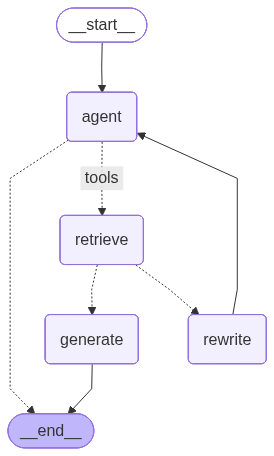

In [57]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [58]:
# graph.invoke({"messages":"What is Langgraph?"})

from langchain_core.messages import HumanMessage

graph.invoke({"messages": [HumanMessage(content="What is Langgraph?")]})


---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='ee81c4b8-629e-4b11-a23c-a6cc4c992281'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user asks: "What is Langgraph?" We need to answer. Possibly we should retrieve info from a blog about Langgraph. Use the function retriever_vector_db_blog with query "Langgraph".', 'tool_calls': [{'id': 'fc_0580be06-9b6c-42e8-b050-32a6b6ec2e9d', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 74, 'prompt_tokens': 172, 'total_tokens': 246, 'completion_time': 0.154448694, 'prompt_time': 0.006880424, 'queue_time': 0.048107426, 'total_time': 0.161329118, 'completion_tokens_details': {'reasoning_tokens': 42}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_1d1727abc9', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'm

In [60]:
graph.invoke({"messages": [HumanMessage(content="Langgraph")]})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='Langgraph', additional_kwargs={}, response_metadata={}, id='fff5d574-c44e-4637-afd6-7105ab7ab08b'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'The user just says "Langgraph". Likely they want information about Langgraph. We should retrieve relevant info. Use retriever_vector_db_blog with query "Langgraph".', 'tool_calls': [{'id': 'fc_330cf778-8a73-49f0-b635-4a65e53b52c3', 'function': {'arguments': '{"query":"Langgraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 68, 'prompt_tokens': 169, 'total_tokens': 237, 'completion_time': 0.14277723, 'prompt_time': 0.007232976, 'queue_time': 0.048139784, 'total_time': 0.150010206, 'completion_tokens_details': {'reasoning_tokens': 36}}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_fd1fe7f861', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id=

In [61]:
graph.invoke({"messages": [HumanMessage(content="Langchain")]})

---CALL AGENT---


{'messages': [HumanMessage(content='Langchain', additional_kwargs={}, response_metadata={}, id='3cd4a9c3-3202-4b83-9159-dc7d178689f3'),
  AIMessage(content='Sure! Here’s a quick snapshot of **LangChain**—what it is, why it matters, and how you can start using it. Let me know if you’d like deeper details on any particular area (e.g., code examples, deployment, integrations, or a comparison with LangGraph).\n\n---\n\n## 1️⃣ What is LangChain?\n\n**LangChain** is an open‑source framework that makes it easier to build **applications powered by large language models (LLMs)**. It does this by providing modular, reusable building blocks for:\n\n| Layer | What it does | Typical components |\n|------|--------------|--------------------|\n| **LLM** | Calls to any LLM provider (OpenAI, Anthropic, Cohere, etc.) | `OpenAI`, `ChatOpenAI`, `Anthropic`, `Cohere` wrappers |\n| **Prompt** | Structured prompt creation & templating | `PromptTemplate`, `FewShotPromptTemplate`, `ChatPromptTemplate` |\n| **M

In [25]:
graph.invoke({"messages":"What is Machine learning?"})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='9e30ea14-198e-4d66-a99d-0e92e56cf200'),
  AIMessage(content='**Machine learning (ML)** is a sub‑field of artificial intelligence (AI) that focuses on building systems that can **learn from data** and improve their performance on a task without being explicitly programmed for every possible situation.\n\n### Core Idea\n- **Traditional programming:** You write explicit rules (if‑else statements) that tell a computer exactly what to do.\n- **Machine learning:** You give the computer **examples (data)** and a **goal** (e.g., predict a label, generate a recommendation). The computer automatically discovers patterns and creates a model that can make predictions or decisions on new, unseen data.\n\n### How It Works (High‑Level Pipeline)\n\n| Step | Description |\n|------|-------------|\n| 1️⃣ **Define the problem** | Classification, regression, clustering, recommendation, generation

In [ ]:
graph.invoke